<a href="https://colab.research.google.com/github/carmen-herlo/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos: Carmen Hernández López<br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>

https://colab.research.google.com/drive/1a6ecqw1KtudwYUuIBXlcIoMih-4HMLLC#scrollTo=AiskKkzZfy4e


Problema:
> 
> Organizar los horarios de partidos de La Liga<br>
        

In [0]:
Desde la  La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia. 

Los horarios disponibles se conocen a priori y son los siguientes:
<img src="horario.jpg" width="200">

En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores que tienen relación directa con la audiencia. Hay 4 equipos en la categoría A, 10 equipos de categoría B y 6 equipos de categoría C. 

Se conoce estadisticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todoslos casos).
<img src="categorias.jpg" width="400">
 
Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla.

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.
<img src="ponderacion_por_horario.jpg" width="500">

Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:
<img src="ponderacion_por_coincidencias.jpg" width="200">

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla:
<img src="ejemplo_jornada.jpg" width="800">
                                

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?




Respuesta

In [0]:
***Posibilidades sin tener en cuenta las restricciones:***

¿De cuántas maneras se pueden repartir en 10 franjas horarias los 10 partidos de una jornada?

Se trata de Variaciones con repetición, en la que los elementos n son los horarios y las agrupaciones de r en r se refieren al número de partidos de la jornada:
$VR_n^r ={10}^{10}=10 000 000 000$ o lo que es lo mismo, 10 mil millones de posibilidades.


***Posibilidades teniendo en cuenta las restricciones:***

La restricción dice: "Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes."

Luego tendrá que haber uno o más partidos en las franjas horarias del Viernes y el Lunes.

Partimos del dato de todas las variaciones posibles calculado anteriormente:

$VR_n^r ={10}^{10}$ 

A todas estas variaciones tenemos que restarles las que incumplan la restricción. 

Primeramente, calculamos las variaciones de que no haya partido en la franja horaria de Lunes. Para ello usaremos las variaciones con repetición teniendo en cuenta que ahora el número de franjas horarias será 9 pero seguirá habiendo que coger elementos de 10 en 10 pues el número de partidos no cambia:

$VR_n^r ={9}^{10}$

Siguiendo el mismo razonamiento, las variaciones con repetición que incumplen la restricción de que no haya partido los Viernes es el valor calculado para la restricción del Lunes. 

Debido a que el número de variaciones para los que no hay partido el Lunes contiene combinaciones que tampoco tienen partido los Viernes y que esta situación es recíproca, se debe sumar las variaciones en los que no hay partidos ni en la franja horaria Lunes ni en la franja horaria Viernes. Como nos enuncia la teoría de conjuntos:

conjunto A = {variaciones sin contar franja horaria Lunes}

conjunto B = {variaciones sin contar franja horaria Viernes}

Dado que A y B se interseccionan, $\left|A\cup B\right| = \left|A\right| + \left|B\right| - \left|A\cap B\right|$

Para calcular las variaciones en las que no hay partido ni Lunes ni Viernes se toman los 8 horarios restantes que se toman para los 10 partidos de la jornada:

$\left|A\cap B\right| = VR_n^r ={8}^{10}$

Por tanto, las variaciones con repetición teniendo en cuenta la restricción serían:

$ VariacionesConRestriccion = VariacionesTotales - \left|A\cup B\right| = VariacionesTotales - (\left|A\right| + \left|B\right| - \left|A\cap B\right|) = {10}^{10} - {9}^{10} - {9}^{10} + {8}^{10} = 4100173022$ 

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

In [0]:
Existen dos opciones:

a) Algoritmos heurísticos: Introducir aleatoriedad en el problema para poder llegar a resulados óptimos. Búsqueda aleatoria, colonia de hormigas, algoritmos genéticos... Pueden ser constructivos secuencialmente o no. Influirá mucho la creatividad del ingeniero para la aproximación a la solución óptima.

b) Algoritos de búsqueda en árboles -ramificación y poda-: Realizando exploraciones pero descartando ramas del árbol de soluciones porque se hagan evidentes que no conducirán a buenas soluciones.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

In [0]:
Función objetivo:

Se parte de un ejemplo de jornada, con sus equipos de categorías A-B-C, y su base en millones.

Se introduce una solución de distribución de franjas horarias (de las variaciones con repetición), y una vez introducido se puede calcular la ponderación, la baseXponderación y la corrección.

Se obtiene así las audiencias por partido.

**El sumatorio de las audiencias por partido de cada solución (cada variación) es nuestra función objetivo a maximizar, dado que lo que se busca es la máxima audiencia.**

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

A continuación se deja escrito el código que se emplearía por fuerza bruta:

In [0]:
import pandas as pd
import numpy as np
import random
from itertools import product
import matplotlib.pyplot as plt
import time
import scipy.signal

In [0]:
# =============================================================================
# LISTAS DE DATOS
# =============================================================================
equipos = ['Alavés', 'Athletic', 'Atlético', 'Barcelona', 'Betis', 'Celta',
           'Eibar', 'Espanyol', 'Getafe', 'Granada', 'Leganés', 'Levante',
           'Mallorca', 'Osasuna', 'Real Madrid', 'Real Sociedad', 'Sevilla',
           'Valencia', 'Valladolid', 'Villareal']

categorias = ['A', 'B', 'C']

horas = ['12', '16', '18', '20']

horario = ['V20', 'S12', 'S16', 'S18', 'S20',
            'D12', 'D16', 'D18', 'D20', 'L20']

categorias_equipo_dic = {'Alavés': 'B',
                         'Athletic': 'B',
                         'Atlético': 'A',
                         'Barcelona': 'A',
                         'Betis': 'B',
                         'Celta': 'B',
                         'Eibar': 'C',
                         'Espanyol': 'B',
                         'Getafe': 'B',
                         'Granada': 'C',
                         'Leganés': 'C',
                         'Levante': 'B',
                         'Mallorca': 'C',
                         'Osasuna': 'C',
                         'Real Madrid': 'A',
                         'Real Sociedad': 'A',
                         'Sevilla': 'B',
                         'Valencia': 'B',
                         'Valladolid': 'C',
                         'Villareal': 'B'
                         }

In [0]:
# =============================================================================
# TABLA AUDIENCIAS
# =============================================================================
audiencia_dic = {'A': [2, 1.3, 1],
                 'B': [1.3, 0.9, 0.75],
                 'C': [1, 0.75, 0.47]
                 }

audiencia_df = pd.DataFrame(audiencia_dic, index=categorias)

audiencia_df

,A,B,C
A,2.0,1.30,1.00
B,1.3,0.90,0.75
C,1.0,0.75,0.47


In [0]:
# =============================================================================
# TABLA COEFICIENTE DE REDUCCIÓN
# =============================================================================
ponderacion_dic = {'V': [0, 0, 0, 0.4],
                   'S': [0.55, 0.7, 0.8, 1],
                   'D': [0.45, 0.75, 0.5, 1],
                   'L': [0, 0, 0, 0.4]
                   }

ponderacion_df = pd.DataFrame(ponderacion_dic, index=horas)

ponderacion_df

,V,S,D,L
12,0.0,0.55,0.45,0.0
16,0.0,0.70,0.75,0.0
18,0.0,0.80,0.50,0.0
20,0.4,1.00,1.00,0.4


In [0]:
# =============================================================================
# TABLA COINCIDENCIAS
# =============================================================================
coincidencias_dic = {'% reducción': [0, 0.25, 0.45, 0.60, 0.70, 0.75, 0.78, 0.80, 0.80]}

coincidencias_df = pd.DataFrame(coincidencias_dic, index=np.arange(len(coincidencias_dic['% reducción'])))

coincidencias_df

,% reducción
0,0.00
1,0.25
2,0.45
3,0.60
4,0.70
5,0.75
6,0.78
7,0.80
8,0.80


In [0]:
# =============================================================================
# GENERACIÓN DE UNA JORNADA ALEATORIA
# =============================================================================
equipos_rand = equipos.copy()
random.shuffle(equipos_rand)

jornada=[0 for k in range(len(equipos_rand)//2)]
for i in range(len(equipos_rand)//2):
    jornada[i]=(equipos_rand[i],equipos_rand[i+len(equipos_rand)//2])
    
local = equipos_rand[:(len(equipos_rand)//2)]
visitante = equipos_rand[len(equipos_rand)//2:]

jornada

[('Betis', 'Granada'),
 ('Eibar', 'Valladolid'),
 ('Celta', 'Real Sociedad'),
 ('Leganés', 'Villareal'),
 ('Alavés', 'Sevilla'),
 ('Levante', 'Barcelona'),
 ('Getafe', 'Espanyol'),
 ('Mallorca', 'Valencia'),
 ('Atlético', 'Real Madrid'),
 ('Athletic', 'Osasuna')]

In [0]:
# =============================================================================
# FUNCIÓN DE CÁLCULO
# =============================================================================
def calculo_function():
    cols = ['Local', 'Visitante', 'Categoría Local', 'Categoría Visitante', 
        'Horario', 'Base (Mill)', 'Ponderación', 'Base*Ponderación', 'Corrección']   

    calculo_df = pd.DataFrame(index=np.arange(len(local)), columns=cols)
    calculo_df.loc[:]['Local']=local
    calculo_df.loc[:]['Visitante']=visitante
    
    for i, (m, n) in enumerate(zip(local, visitante)):
        #Categoría
        calculo_df.loc[i]['Categoría Local']=categorias_equipo_dic[m]
        calculo_df.loc[i]['Categoría Visitante']=categorias_equipo_dic[n]
        #Base
        calculo_df.loc[i]['Base (Mill)'] = audiencia_df[categorias_equipo_dic[m]][categorias_equipo_dic[n]]
        
    return calculo_df
    
calculo_df = calculo_function()

In [0]:
calculo_df

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Betis,Granada,B,C,NaN,0.75,NaN,NaN,NaN
1,Eibar,Valladolid,C,C,NaN,0.47,NaN,NaN,NaN
2,Celta,Real Sociedad,B,A,NaN,1.3,NaN,NaN,NaN
3,Leganés,Villareal,C,B,NaN,0.75,NaN,NaN,NaN
4,Alavés,Sevilla,B,B,NaN,0.9,NaN,NaN,NaN
5,Levante,Barcelona,B,A,NaN,1.3,NaN,NaN,NaN
6,Getafe,Espanyol,B,B,NaN,0.9,NaN,NaN,NaN
7,Mallorca,Valencia,C,B,NaN,0.75,NaN,NaN,NaN
8,Atlético,Real Madrid,A,A,NaN,2,NaN,NaN,NaN
9,Athletic,Osasuna,B,C,NaN,0.75,NaN,NaN,NaN


El código para calcular todas las variaciones sería el siguiente:

In [0]:
# =============================================================================
# VARIACIONES
# =============================================================================

#from itertools import product
#variaciones =list(product(horario, repeat=len(horario)))

Que no ejecutamos por raciones evidentes, pues nos daría un error de memoria.

Sin embargo, si podemos calcular el número total de variaciones:

In [0]:
n_variaciones = len(jornada)**len(horario)
print('El número de variaciones es {} millones.'.format(int(n_variaciones/10e6)))

El número de variaciones es 1000 millones.


In [0]:
# =============================================================================
# FUERZA BRUTA - cálculo de horario para máxima audiencia
# =============================================================================
def max_audiencia_fuerza_bruta(variaciones):
    audiencia = 0    
    for n in variaciones:

        horario_temp = n

        calculo_df.loc[:]['Horario'] = horario_temp

        #PONDERACIÓN
        for i, n in enumerate(calculo_df[:]['Horario']):
            #Ponderación
            calculo_df.loc[i]['Ponderación'] = ponderacion_df.loc[n[1:]][n[:1]]
            #Base*Ponderación
            calculo_df.loc[i]['Base*Ponderación'] = calculo_df.loc[i]['Base (Mill)']*calculo_df.loc[i]['Ponderación']
            #Corrección
            coincidencias = len(calculo_df.loc[calculo_df[:]['Horario']==n])-1
            reduccion = 1 - coincidencias_df.loc[coincidencias]['% reducción']
            calculo_df.loc[i]['Corrección'] = calculo_df.loc[i]['Base*Ponderación']*reduccion

        audiencia_temp = calculo_df.loc[:]['Corrección'].sum()

        if audiencia_temp>audiencia:
            audiencia = audiencia_temp
            horario = horario_temp 

        return horario, audiencia


Como no podemos calcular por fuerza bruta, se va a generar tres horarios aleatorios y comprobar por fuerza bruta cuál tiene máxima audiencia.

Se recuerda que una de las restricciones es que SIEMPRE debe haber un partido en Viernes a las 20:00 ('V20') y Lunes a las 20:00 ('L20').

In [0]:
horario_variable = horario[1:-1]
horario_fijo = [horario[0],horario[-1]]
horario_rand = []
N=3
for n in range(N):
    var1 = np.random.choice(horario_variable, size=len(horario_variable))
    var1 = np.append(var1, horario_fijo)
    var_extend = np.random.choice(var1, len(var1), replace=False)
    horario_rand.append(var_extend)
    print('Horario random: {}'.format(var_extend))

Horario random: ['L20' 'S16' 'S16' 'S16' 'S20' 'D12' 'D20' 'D12' 'V20' 'D16']
Horario random: ['D16' 'S12' 'V20' 'S20' 'S18' 'S20' 'D12' 'S18' 'L20' 'D18']
Horario random: ['S12' 'S18' 'S16' 'V20' 'D20' 'D20' 'D20' 'S20' 'L20' 'D12']


Calculamos la audiencia máxima de nuestras tres variaciones:

In [0]:
mejor_solucion, mejor_audiencia = max_audiencia_fuerza_bruta(horario_rand)

print('De los tres horarios, el que maximiza la audiencia es:\n{}'.format(mejor_solucion))
print('Con una audiencia de {} millones.'.format(round(mejor_audiencia,2)))

De los tres horarios, el que maximiza la audiencia es:
['L20' 'S16' 'S16' 'S16' 'S20' 'D12' 'D20' 'D12' 'V20' 'D16']
Con una audiencia de 5.12 millones.


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

In [0]:
Complejidad cuadrática. Aunque existen complejidades a priori de mayor dificultad, el valor que multiplica a la complejidad es tan alto (número de iteraciones en el primer bucle es el número de variaciones) que lo hacen de un coste computacional inviable a través de fuerza bruta.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [0]:
Se va a emplear el método heurístico de búsqueda aleatoria.

Se generarán N horarios aleatorios y se escogerá el de más audiencia. Se establecerá un compromiso entre el número de horarios a evaluar y el coste computacional, pues llega un punto en el que por muchos más horarios que se evaluen, no se obtienen muchos mejores resultados de audiencia y sin embargo estamos penalizando gravemente el coste temporal de computación.

Se ha establecido N=100 horarios aleatorios.

In [0]:
def audiencia(H):
    calculo_df.loc[:]['Horario'] = H
    for i, n in enumerate(calculo_df[:]['Horario']):
        #Ponderación
        calculo_df.loc[i]['Ponderación'] = ponderacion_df.loc[n[1:]][n[:1]]
        #Base*Ponderación
        calculo_df.loc[i]['Base*Ponderación'] = calculo_df.loc[i]['Base (Mill)']*calculo_df.loc[i]['Ponderación']
        #Corrección
        coincidencias = len(calculo_df.loc[calculo_df[:]['Horario']==n])-1
        reduccion = 1 - coincidencias_df.loc[coincidencias]['% reducción']
        calculo_df.loc[i]['Corrección'] = calculo_df.loc[i]['Base*Ponderación']*reduccion
    
    audiencia_por_partido = np.array(calculo_df.loc[:]['Corrección'], dtype=float)
    
    return audiencia_por_partido, calculo_df


def busqueda_aleatoria(horario, N):
    horario_variable = horario[1:-1]
    horario_fijo = [horario[0],horario[-1]]
    mejor_audiencia = 0
    for i in range(N):    
        #Elige nuevo horario
        var1 = np.random.choice(horario_variable, size=len(horario_variable))
        var1 = np.append(var1, horario_fijo)
        nuevo_horario = np.random.choice(var1, len(var1), replace=False)
        #Calculamos la audiencia
        audiencia_jornada, calculo_df_jornada = audiencia(nuevo_horario)
        audiencia_total_jornada = audiencia_jornada.sum()
        #Seleccionamos mejor audiencia
        if audiencia_total_jornada > mejor_audiencia:
            mejor_solucion = nuevo_horario
            mejor_audiencia = audiencia_total_jornada
            
    return mejor_solucion, mejor_audiencia

In [0]:
N=100

mejor_solucion, mejor_audiencia = busqueda_aleatoria(horario,N)

print('De los {} horarios, el que maximiza la audiencia es:\n{}'.format(N,mejor_solucion))
print('Con una audiencia de {} millones.'.format(round(mejor_audiencia,2)))

De los 100 horarios, el que maximiza la audiencia es:
['V20' 'S18' 'L20' 'S16' 'S12' 'S20' 'D12' 'D20' 'D16' 'S18']
Con una audiencia de 6.53 millones.


In [0]:
a, tabla = audiencia(mejor_solucion)
tabla

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Betis,Granada,B,C,V20,0.75,0.4,0.3,0.3
1,Eibar,Valladolid,C,C,S18,0.47,0.8,0.376,0.282
2,Celta,Real Sociedad,B,A,L20,1.3,0.4,0.52,0.52
3,Leganés,Villareal,C,B,S16,0.75,0.7,0.525,0.525
4,Alavés,Sevilla,B,B,S12,0.9,0.55,0.495,0.495
5,Levante,Barcelona,B,A,S20,1.3,1,1.3,1.3
6,Getafe,Espanyol,B,B,D12,0.9,0.45,0.405,0.405
7,Mallorca,Valencia,C,B,D20,0.75,1,0.75,0.75
8,Atlético,Real Madrid,A,A,D16,2,0.75,1.5,1.5
9,Athletic,Osasuna,B,C,S18,0.75,0.8,0.6,0.45


In [0]:
#Comprobamos:
print('En la columna \'Horario\' tenemos los horarios finales.')
print('En la columna \'Correción\' se encuentran las audiencias por partido, que si se suman dan {} millones.'.format(np.sum(tabla[:]['Corrección'])))

En la columna 'Horario' tenemos los horarios finales.
En la columna 'Correción' se encuentran las audiencias por partido, que si se suman dan 6.527 millones.


(*)Calcula la complejidad del algoritmo 

Respuesta

In [0]:
Se trata también de un algoritmo de complejidad cuadrática, pero en este problema el punto esencial no era reducir la complejidad sino buscar métodos alternativos a la fuerza bruta (que hemos visto que era, de cualquier manera con la tecnología de hoy por hoy, inviable)-. 

Se está reduciendo un algoritmo de 10 000 millones de variaciones a uno de 100. En este caso hemos escogido N=100, aunque podría haberse escogido otro valor. 

Como se ha explicado con anterioridad, el número de horarios y la maximización de la audiencia no tienen una relación lineal, y se ha establecido N=100 como un número óptimo de variaciones. Se ha probado con números más altos y no se consiguen mejores resultados en la audiencia y sin embargo el coste temporal de computación se había disparado. 

***Mejora:*** Búsqueda aleatoria ponderada.

Observemos los pesos que tienen los partidos en función del horario en el que se juegue. El valor de la siguiente tabla muestra la penalización de la audiencia según horario:

In [0]:
ponderacion_df

,V,S,D,L
12,0.0,0.55,0.45,0.0
16,0.0,0.70,0.75,0.0
18,0.0,0.80,0.50,0.0
20,0.4,1.00,1.00,0.4


Se sabe que siempre debe haber partidos los Viernes y Lunes a las 20:00, así que dejaremos a éstos de un lado.

El resto de horarios serán ponderados según la penalización. Ésto es, se establecerá que aquellos horarios que penalizan menos la audiencia tengan más probabilidad de aparecer que aquellos que la penalizan más.

In [0]:
pesos = [0.55, 0.7, 0.8, 1, 0.45, 0.75, 0.5, 1]
pesos_norm = pesos/np.sum(pesos)


def busqueda_aleatoria_ponderada(horario, N):
    horario_variable = horario[1:-1]
    horario_fijo = [horario[0],horario[-1]]
    mejor_audiencia = 0
    for i in range(N):    
        #Elige nuevo horario
        var1 = np.random.choice(horario_variable, size=len(horario_variable), p=pesos_norm)
        var1 = np.append(var1, horario_fijo)
        nuevo_horario = np.random.choice(var1, len(var1), replace=False)
        #Calculamos la audiencia
        audiencia_jornada, calculo_df_jornada = audiencia(nuevo_horario)
        audiencia_total_jornada = audiencia_jornada.sum()
        #Seleccionamos mejor audiencia
        if audiencia_total_jornada > mejor_audiencia:
            mejor_solucion = nuevo_horario
            mejor_audiencia = audiencia_total_jornada
            
    return mejor_solucion, mejor_audiencia

In [0]:
N=100

mejor_solucion, mejor_audiencia = busqueda_aleatoria_ponderada(horario,N)

print('De los {} horarios, el que maximiza la audiencia es:\n{}'.format(N,mejor_solucion))
print('Con una audiencia de {} millones.'.format(round(mejor_audiencia,2)))

De los 100 horarios, el que maximiza la audiencia es:
['S18' 'S18' 'D18' 'S16' 'L20' 'D16' 'V20' 'D20' 'S20' 'D16']
Con una audiencia de 6.53 millones.


In [0]:
a, tabla = audiencia(mejor_solucion)
tabla

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Betis,Granada,B,C,S18,0.75,0.8,0.6,0.45
1,Eibar,Valladolid,C,C,S18,0.47,0.8,0.376,0.282
2,Celta,Real Sociedad,B,A,D18,1.3,0.5,0.65,0.65
3,Leganés,Villareal,C,B,S16,0.75,0.7,0.525,0.525
4,Alavés,Sevilla,B,B,L20,0.9,0.4,0.36,0.36
5,Levante,Barcelona,B,A,D16,1.3,0.75,0.975,0.73125
6,Getafe,Espanyol,B,B,V20,0.9,0.4,0.36,0.36
7,Mallorca,Valencia,C,B,D20,0.75,1,0.75,0.75
8,Atlético,Real Madrid,A,A,S20,2,1,2,2
9,Athletic,Osasuna,B,C,D16,0.75,0.75,0.5625,0.421875


In [0]:
#Comprobamos:
print('En la columna \'Horario\' tenemos los horarios finales.')
print('En la columna \'Correción\' se encuentran las audiencias por partido, que si se suman dan {} millones.'.format(np.sum(tabla[:]['Corrección'])))

En la columna 'Horario' tenemos los horarios finales.
En la columna 'Correción' se encuentran las audiencias por partido, que si se suman dan 6.530125 millones.


***Mejora:*** Búsqueda aleatoria sesgada.

Se sabe que cuantos más partidos se hagan dentro de una misma franja horaria, habrá más penalización en la audiencia (las audiencias se reparten). 

Por tanto, vamos a generar unas soluciones aleatorias en las que no se repitan partidos dentro de una misma franja. Un horario con la máxima audiencia total no tiene por qué tener éste reparto, pero sí tiene más probabilidades.

In [0]:
# =============================================================================
# BÚSQUEDA ALEATORIA SESGADA
# =============================================================================
def busqueda_aleatoria_sesgada(horario, N):
    mejor_audiencia = 0
    for i in range(N):    
        #Elige nuevo horario
        nuevo_horario = np.random.choice(horario, len(horario), replace=False)
        #Calculamos la audiencia
        audiencia_jornada, calculo_df_jornada = audiencia(nuevo_horario)
        audiencia_total_jornada = audiencia_jornada.sum()
        #Seleccionamos mejor audiencia
        if audiencia_total_jornada > mejor_audiencia:
            mejor_solucion = nuevo_horario
            mejor_audiencia = audiencia_total_jornada
            
    return mejor_solucion, mejor_audiencia

In [0]:
N=100

mejor_solucion, mejor_audiencia = busqueda_aleatoria_sesgada(horario,N)

print('\nBÚSQUEDA ALEATORIA SESGADA')
print('De los {} horarios, el que maximiza la audiencia es:\n{}'.format(N,mejor_solucion))
print('Con una audiencia de {} millones.'.format(round(mejor_audiencia,2)))


BÚSQUEDA ALEATORIA SESGADA
De los 100 horarios, el que maximiza la audiencia es:
['D12' 'L20' 'D20' 'S12' 'D18' 'S18' 'V20' 'S16' 'S20' 'D16']
Con una audiencia de 7.18 millones.


In [0]:
a, tabla = audiencia(mejor_solucion)
tabla

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Betis,Granada,B,C,D12,0.75,0.45,0.3375,0.3375
1,Eibar,Valladolid,C,C,L20,0.47,0.4,0.188,0.188
2,Celta,Real Sociedad,B,A,D20,1.3,1,1.3,1.3
3,Leganés,Villareal,C,B,S12,0.75,0.55,0.4125,0.4125
4,Alavés,Sevilla,B,B,D18,0.9,0.5,0.45,0.45
5,Levante,Barcelona,B,A,S18,1.3,0.8,1.04,1.04
6,Getafe,Espanyol,B,B,V20,0.9,0.4,0.36,0.36
7,Mallorca,Valencia,C,B,S16,0.75,0.7,0.525,0.525
8,Atlético,Real Madrid,A,A,S20,2,1,2,2
9,Athletic,Osasuna,B,C,D16,0.75,0.75,0.5625,0.5625


In [0]:
#Comprobamos:
print('En la columna \'Horario\' tenemos los horarios finales.')
print('En la columna \'Correción\' se encuentran las audiencias por partido, que si se suman dan {} millones.'.format(np.sum(tabla[:]['Corrección'])))

En la columna 'Horario' tenemos los horarios finales.
En la columna 'Correción' se encuentran las audiencias por partido, que si se suman dan 7.1754999999999995 millones.


Vamos a comparar las soluciones de los tres algoritmos para número de iteraciones 50, 100 y 150:

In [0]:
N = [50, 100, 150]
index = ['BÚSQUEDA_ALEATORIA', 'BÚSQUEDA_ALEATORIA_PONDERADA', 'BÚSQUEDA_ALEATORIA_SESGADA']
algs = busqueda_aleatoria, busqueda_aleatoria_ponderada, busqueda_aleatoria_sesgada

max_audiencia_df = pd.DataFrame(index=index, columns=N)

mejor_audiencia = 0

for a, i in zip(algs,index):
    for n in N:
        solucion_actual, audiencia_actual = a(horario,n)
        max_audiencia_df.loc[i][n] = audiencia_actual
        if audiencia_actual>mejor_audiencia:
            mejor_audiencia = audiencia_actual
            mejor_solucion = solucion_actual
            
print('Audiencias por algoritmo y por número de iteraciones:')
max_audiencia_df

Audiencias por algoritmo y por número de iteraciones:


,50,100,150
BÚSQUEDA_ALEATORIA,6.9635,6.8425,6.559
BÚSQUEDA_ALEATORIA_PONDERADA,6.6855,6.52925,6.96113
BÚSQUEDA_ALEATORIA_SESGADA,7.028,7.244,7.138


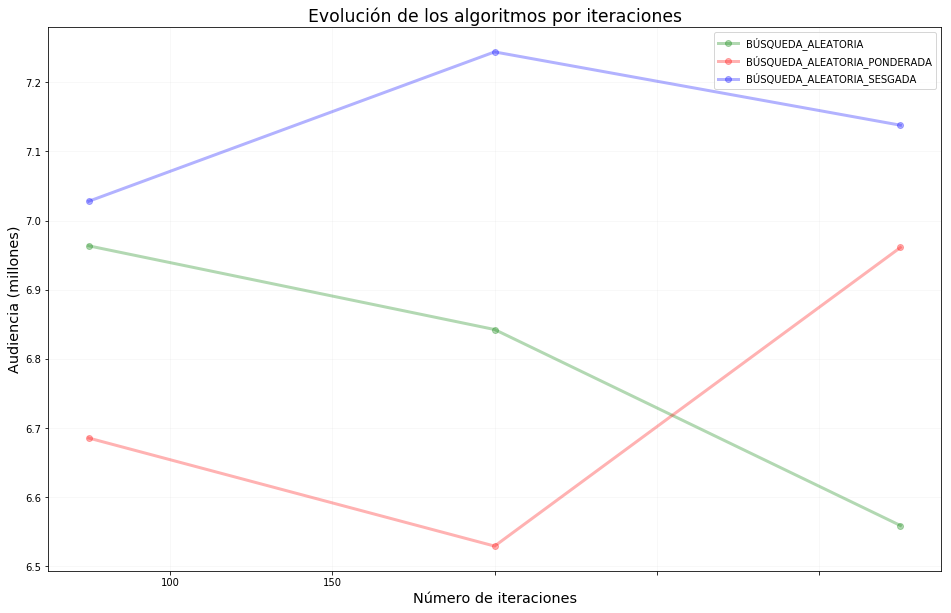

In [0]:
color = ['g', 'r', 'b']

fig, axis = plt.subplots(figsize=(16, 10))

for a, c in zip(index,color):
    axis.plot(max_audiencia_df.loc[a],'go-', color=c, linewidth=3, alpha=0.3)

axis.grid(alpha=0.1)

axis.set_xticklabels(np.arange(50,150+50,50))

#Títulos
axis.set_xlabel('Número de iteraciones', fontsize='x-large')
axis.set_ylabel('Audiencia (millones)', fontsize='x-large')
axis.set_title('Evolución de los algoritmos por iteraciones', fontsize='xx-large')

#Leyenda
axis.legend(loc='best') 

Se observa una ligera mejora al aumentar el número de iteraciones, y teniendo en cuenta que el coste computacional crece exponencialmente, N=100 supone un buen número -nótese que también es influyente el procesador que se emplee a la hora de la elección del número de iteraciones-.

Por otro lado, se observa que las mejoras en el algoritmo funcionan aunque para búsqueda aleatoria ponderada requiere resultados más fiables a partir de N=100 o un número más alto de iteraciones, mientras que búsqueda aleatoria sesgada presenta mejoría desde el principio. 

El algoritmo que presenta mejores resultados es el de búsqueda aleatoria sesgada.

Estos resultados se pueden ratificar reiniciando con el algoritmo con otras nuevas jornadas.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [0]:
El problema ya se ha evaluado con un juego de datos aleatorio, pero vamos a generar otro:

In [0]:
equipos_rand = equipos.copy()
random.shuffle(equipos_rand)

jornada=[0 for k in range(len(equipos_rand)//2)]
for i in range(len(equipos_rand)//2):
    jornada[i]=(equipos_rand[i],equipos_rand[i+len(equipos_rand)//2])
    
local = equipos_rand[:(len(equipos_rand)//2)]
visitante = equipos_rand[len(equipos_rand)//2:]

jornada

[('Valencia', 'Getafe'),
 ('Villareal', 'Leganés'),
 ('Real Madrid', 'Osasuna'),
 ('Granada', 'Atlético'),
 ('Mallorca', 'Valladolid'),
 ('Real Sociedad', 'Eibar'),
 ('Espanyol', 'Alavés'),
 ('Levante', 'Athletic'),
 ('Sevilla', 'Betis'),
 ('Barcelona', 'Celta')]

Aplica el algoritmo al juego de datos generado

Respuesta

In [0]:
del calculo_df

In [0]:
calculo_df = calculo_function()
calculo_df

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Valencia,Getafe,B,B,NaN,0.9,NaN,NaN,NaN
1,Villareal,Leganés,B,C,NaN,0.75,NaN,NaN,NaN
2,Real Madrid,Osasuna,A,C,NaN,1,NaN,NaN,NaN
3,Granada,Atlético,C,A,NaN,1,NaN,NaN,NaN
4,Mallorca,Valladolid,C,C,NaN,0.47,NaN,NaN,NaN
5,Real Sociedad,Eibar,A,C,NaN,1,NaN,NaN,NaN
6,Espanyol,Alavés,B,B,NaN,0.9,NaN,NaN,NaN
7,Levante,Athletic,B,B,NaN,0.9,NaN,NaN,NaN
8,Sevilla,Betis,B,B,NaN,0.9,NaN,NaN,NaN
9,Barcelona,Celta,A,B,NaN,1.3,NaN,NaN,NaN


In [0]:
N=[100]

del max_audiencia_df
max_audiencia_df = pd.DataFrame(index=index, columns=N)

mejor_audiencia = 0

for a, i in zip(algs,index):
    for n in N:
        solucion_actual, audiencia_actual = a(horario,n)
        max_audiencia_df.loc[i][n] = audiencia_actual
        if audiencia_actual>mejor_audiencia:
            mejor_audiencia = audiencia_actual
            mejor_solucion = solucion_actual
            
print('Audiencias por algoritmo:')
max_audiencia_df

Audiencias por algoritmo:


,100
BÚSQUEDA_ALEATORIA,6.025
BÚSQUEDA_ALEATORIA_PONDERADA,6.03925
BÚSQUEDA_ALEATORIA_SESGADA,6.273


In [0]:
print('Franja horaria en la que jugarán los equipos:\n')
for j, s in zip(jornada, mejor_solucion):
    print(j, s)

Franja horaria en la que jugarán los equipos:

('Valencia', 'Getafe') D12
('Villareal', 'Leganés') L20
('Real Madrid', 'Osasuna') S18
('Granada', 'Atlético') D16
('Mallorca', 'Valladolid') V20
('Real Sociedad', 'Eibar') S12
('Espanyol', 'Alavés') S16
('Levante', 'Athletic') D18
('Sevilla', 'Betis') D20
('Barcelona', 'Celta') S20


In [0]:
a, tabla = audiencia(mejor_solucion)
tabla

,Local,Visitante,Categoría Local,Categoría Visitante,Horario,Base (Mill),Ponderación,Base*Ponderación,Corrección
0,Valencia,Getafe,B,B,D12,0.9,0.45,0.405,0.405
1,Villareal,Leganés,B,C,L20,0.75,0.4,0.3,0.3
2,Real Madrid,Osasuna,A,C,S18,1,0.8,0.8,0.8
3,Granada,Atlético,C,A,D16,1,0.75,0.75,0.75
4,Mallorca,Valladolid,C,C,V20,0.47,0.4,0.188,0.188
5,Real Sociedad,Eibar,A,C,S12,1,0.55,0.55,0.55
6,Espanyol,Alavés,B,B,S16,0.9,0.7,0.63,0.63
7,Levante,Athletic,B,B,D18,0.9,0.5,0.45,0.45
8,Sevilla,Betis,B,B,D20,0.9,1,0.9,0.9
9,Barcelona,Celta,A,B,S20,1.3,1,1.3,1.3


In [0]:
#Comprobamos:
print('En la columna \'Horario\' tenemos los horarios finales.')
print('En la columna \'Correción\' se encuentran las audiencias por partido, que si se suman dan {} millones.'.format(np.sum(tabla[:]['Corrección'])))

En la columna 'Horario' tenemos los horarios finales.
En la columna 'Correción' se encuentran las audiencias por partido, que si se suman dan 6.273000000000001 millones.


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Slides y videoconferencias de la asignatura Algoritmos de Optimización impartida por el profesor Raúl Reyero.

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Se hizo una mejora -búsqueda aleatoria ponderada- teniendo en cuenta la penalización de la audiencia en función del horario en que se juega el partido, y trasladándo ésto a una probabilidad de aparición de los distintos horarios en los que un partido puede jugar. La magnitud de la mejora es muy pequeña respecto a la magnitud de la aleatoriedad introducida por el algoritmo, así que para ver mejores resultados sería necesario afinar aún más. 

Se introdujo otra mejora -búsqueda aleatoria sesgada- eliminando aquellas soluciones que tenían poco sentido común. En este caso, la mejora funciona notablemente y presenta una clara mejoría en la audiencia.

Se podría, por ejemplo, seguir afinando con un algoritmo de colonia de hormigas, donde se puedan construir soluciones y penalizar o beneficiar (con las feromonas) los elementos que componen dichas soluciones. Se trataría de un método constructivo por pasos, eligiendo elementos de las solución secuencialmente que mejor se adapten.

Otro método heurístico sería algoritmos genéticos, adaptando el problema para generar soluciones fácilmente (población) y además luego combinarlas (cruce).

Además de la heurística, como hemos comentado con anterioridad, se podría emplear algoritmos de búsqueda en árboles -ramificación y poda-, realizando exploraciones pero descartando ramas del árbol de soluciones porque se hagan evidentes que no conducirán a buenas soluciones (como, por ejemplo, el caso de que todos los partidos o gran parte de los partidos se jueguen en un mismo horario). De hecho, el algoritmo de búsqueda aleatoria sesgada se ha fundamentado en la eliminación de resultados poco factibles, aunque introduciendo aleatoriedad en las soluciones restantes.

Estos algoritmos no son del todo "metódicos", sino que proporcionan una idea general de resolución y habrá que adaptarlos al problema en cuestión. Es por esto que la calidad del código y, en especial, la creatividad del ingeniero, serán cruciales para una buena resolución del problema.